# Importação das bibliotecas necessárias

In [2]:
import pandas as pd 
import duckdb as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lazypredict.Supervised import LazyClassifier


# Função de leitura de Queries do duckdb


In [3]:
def executa_query_dd(arquivo_sql):
    with open(arquivo_sql, 'r') as file:
            sql_query = file.read()
            return dd.sql(query=sql_query).df()

# Importação do Dataset

In [4]:
df_inicial = pd.read_csv(r"Dataset\fraud_data.csv")

# Análise exploratória

### Verificando Valores nulos

In [ ]:
df_inicial.isnull().sum()


### Verificando o tipo de dado das colunas no dataset

In [ ]:
df_inicial.info()

In [ ]:
df_inicial.iloc[0].T

### Análise sobre a influência da categoria da compra sobre a fraude

In [8]:
caminho_df_categoria_da_compra = r'Queries\categoria_da_compra.sql'
df_categoria_da_compra = executa_query_dd(caminho_df_categoria_da_compra)
df_categoria_da_compra

,QTD_TRANSACOES_FRAUDE,QTD_TRANSACOES_SEM_IRREGULARIDADE,QTD_TRANSACOES,PROPORCAO_FRAUDE,CATEGORIA_DA_COMPRA
0,381,1012,1393,27.35,shopping_net
1,433,1158,1591,27.22,grocery_pos
2,217,598,815,26.63,misc_net
3,187,1160,1347,13.88,shopping_pos
4,153,1271,1424,10.74,gas_transport
5,33,350,383,8.62,travel
6,62,759,821,7.55,misc_pos
7,55,894,949,5.80,entertainment
8,27,442,469,5.76,grocery_net
9,55,933,988,5.57,personal_care


<Figure size 1000x600 with 0 Axes>

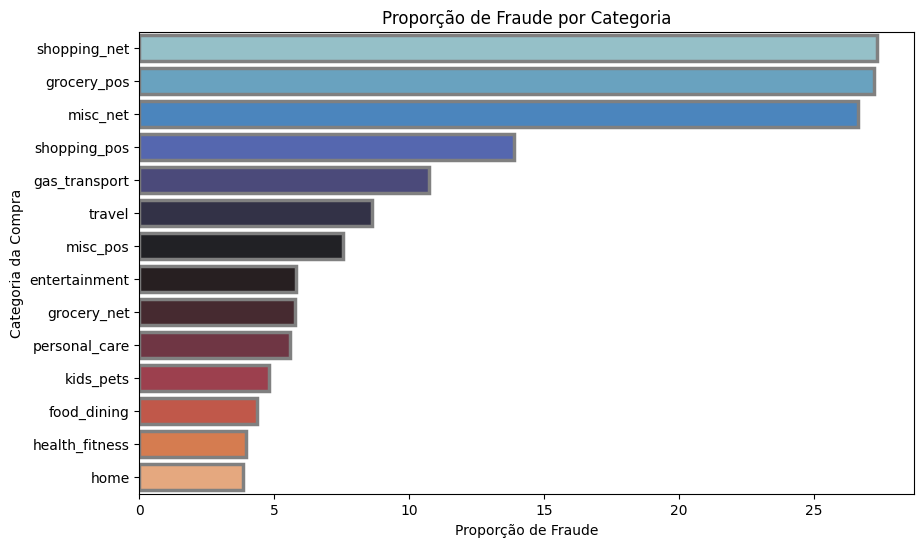

In [9]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_categoria_da_compra, 
    x="PROPORCAO_FRAUDE", 
    y="CATEGORIA_DA_COMPRA", 
    errorbar=("pi", 50), 
    capsize=.4,
    err_kws={"color": ".5", "linewidth": 2.5},
    linewidth=2.5, 
    edgecolor=".5", 
    palette=sns.color_palette("icefire", n_colors=len(df_categoria_da_compra)),  # Usando palette
    orient='h'  # Define a orientação como horizontal
)


plt.xlabel('Proporção de Fraude')
plt.ylabel('Categoria da Compra')
plt.title('Proporção de Fraude por Categoria')


plt.show()

### Análise por Ocupação do comprador

In [10]:
caminho_df_ocupacao_do_comprador = r"Queries\ocupacao_do_comprador.sql"
df_ocupacao_do_comprador = executa_query_dd(caminho_df_ocupacao_do_comprador)
df_ocupacao_do_comprador.head(50)

,QTD_TRANSACOES_FRAUDE,QTD_TRANSACOES_SEM_IRREGULARIDADE,QTD_TRANSACOES,PROPORCAO_FRAUDE,OCUPACAO_DO_CLIENTE
0,10,0,10,100.00,TEFL teacher
1,9,0,9,100.00,Systems developer
2,10,0,10,100.00,"""Development worker, international aid"""
3,11,0,11,100.00,"""Accountant, chartered"""
4,10,0,10,100.00,Fine artist
5,7,0,7,100.00,Clinical cytogeneticist
6,12,0,12,100.00,"""Engineer, site"""
7,12,0,12,100.00,Careers information officer
8,11,0,11,100.00,Industrial/product designer
9,14,0,14,100.00,Commissioning editor


### Análise de correlação entre quantidade de transações e transações fraudulentas

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

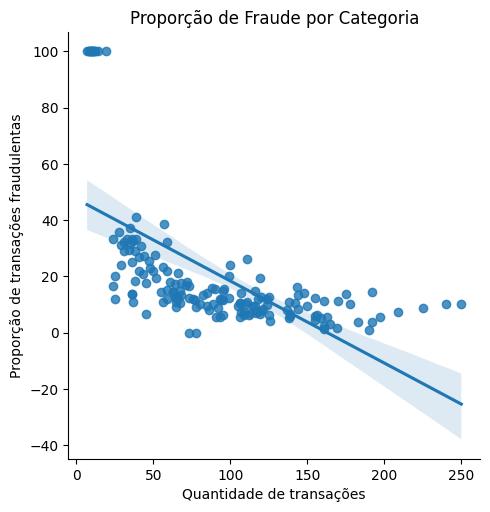

In [33]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
ax = sns.lmplot(
    data=df_ocupacao_do_comprador, 
    x="QTD_TRANSACOES", 
    y="PROPORCAO_FRAUDE",
   palette='deep'
)


plt.xlabel('Quantidade de transações')
plt.ylabel('Proporção de transações fraudulentas')
plt.title('Proporção de Fraude por Categoria')


plt.show()



In [31]:
from scipy.stats import spearmanr

# Calcula o coeficiente de correlação de Spearman
coef_spearman, p_value = spearmanr(df_ocupacao_do_comprador["QTD_TRANSACOES"], df_ocupacao_do_comprador["PROPORCAO_FRAUDE"])
print(p_value)
print(coef_spearman)

9.459196317025445e-34
-0.7738375218841053


foi observado uma correlação consideravel entra a qtde de transações fraudulentas e qtde total de transações

### Análise por estabelecimento

In [12]:
caminho_df_analise_por_estabelecimento = r"Queries\analise_por_estabelecimento.sql"
df_analise_por_estabelecimento = executa_query_dd(caminho_df_analise_por_estabelecimento)
df_analise_por_estabelecimento.head(60)

,QTD_TRANSACOES_FRAUDE,QTD_TRANSACOES_SEM_IRREGULARIDADE,QTD_TRANSACOES,PROPORCAO_FRAUDE,ESTABELECIMENTO_DA_COMPRA
0,6,4,10,60.00,Brown PLC
1,16,15,31,51.61,Kunze Inc
2,17,17,34,50.00,Kerluke-Abshire
3,11,11,22,50.00,Rempel Inc
4,2,2,4,50.00,Emmerich-Luettgen
5,18,19,37,48.65,"""Romaguera, Cruickshank and Greenholt"""
6,8,9,17,47.06,"""Moore, Dibbert and Koepp"""
7,19,22,41,46.34,Kiehn-Emmerich
8,13,16,29,44.83,Terry-Huel
9,8,10,18,44.44,Welch Inc


### Análise por horário da transação

In [13]:
analise_por_horario_da_transacao = r"Queries\analise_por_horario_da_transacao.sql"
df_analise_por_horario = executa_query_dd(analise_por_horario_da_transacao)
df_analise_por_horario.head(60)

,QTD_TRANSACOES_FRAUDE,QTD_TRANSACOES_SEM_IRREGULARIDADE,QTD_TRANSACOES,PROPORCAO_FRAUDE,HORARIO_DA_TRANSACAO
0,950,2654,3604,26.36,2
1,675,4076,4751,14.21,0
2,156,5870,6026,2.59,1


### Análise por cidade do cliente

In [14]:
analise_por_cidade_do_cliente = r"Queries\cidade_do_cliente.sql"
df_analise_por_cidade_do_cliente = executa_query_dd(analise_por_cidade_do_cliente)
df_analise_por_cidade_do_cliente.head(40)

,QTD_TRANSACOES_FRAUDE,QTD_TRANSACOES_SEM_IRREGULARIDADE,QTD_TRANSACOES,PROPORCAO_FRAUDE,CIDADE_DO_CLIENTE
0,12,0,12,100.00,Kaktovik
1,7,0,7,100.00,Vacaville
2,12,0,12,100.00,La Grande
3,19,0,19,100.00,Hubbell
4,10,0,10,100.00,Angwin
5,10,0,10,100.00,Seligman
6,14,0,14,100.00,Craig
7,8,0,8,100.00,Wappapello
8,8,0,8,100.00,Buellton
9,10,0,10,100.00,Downey


### Análise por estado no qual o cliente reside

In [16]:
#Arkansas é o estado com maior proporção de fraude

analise_por_estado_do_cliente = r"Queries\estado_cliente.sql"
df_analise_por_estado_do_cliente  = executa_query_dd(analise_por_estado_do_cliente)
df_analise_por_estado_do_cliente 



,QTD_TRANSACOES_FRAUDE,QTD_TRANSACOES_SEM_IRREGULARIDADE,QTD_TRANSACOES,PROPORCAO_FRAUDE,ESTADO_DO_CLIENTE
0,50,108,158,31.65,AK
1,197,1014,1211,16.27,OR
2,216,1222,1438,15.02,NE
3,115,741,856,13.43,CO
4,121,882,1003,12.06,NM
5,401,2964,3365,11.92,CA
6,262,2062,2324,11.27,MO
7,126,1024,1150,10.96,WA
8,119,981,1100,10.82,WY
9,61,524,585,10.43,UT


### Análise por dia da semana

In [17]:
#Arkansas é o estado com maior proporção de fraude

analise_por_dia_semana = r"Queries\dia_da_transacao.sql"
df_analise_por_dia_semana = executa_query_dd(analise_por_dia_semana)
df_analise_por_dia_semana



,QTD_TRANSACOES_FRAUDE,QTD_TRANSACOES_SEM_IRREGULARIDADE,QTD_TRANSACOES,PROPORCAO_FRAUDE,dia_da_semana
0,296,1475,1771,16.71,6
1,263,1409,1672,15.73,5
2,198,1190,1388,14.27,3
3,328,2372,2700,12.15,1
4,272,2081,2353,11.56,0
5,199,1624,1823,10.92,4
6,225,2449,2674,8.41,2


Nos domingos a proporção de fraude é maior, talvez esse seja o modo esoperante do fraudador

## Construção do Modelo 

In [36]:
#Arkansas é o estado com maior proporção de fraude

querie_principal = r"Querie modelo\query_principal.sql"
df_principal = executa_query_dd(querie_principal)

df_principal.dropna(inplace=True)
df_principal.isnull().sum()
df_principal['TARGET_FRAUDE'] = df_principal['TARGET_FRAUDE'].dropna().astype('int8')
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14444 entries, 0 to 14445
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TARGET_FRAUDE           14444 non-null  int8          
 1   EMPREGO                 14444 non-null  object        
 2   RISCO_CATEGORIA_COMPRA  14444 non-null  object        
 3   RISCO_ESTABELECIMENTO   14444 non-null  object        
 4   RISCO_CIDADE            14444 non-null  object        
 5   RISCO_ESTADO            14444 non-null  object        
 6   HORA_DA_TRANSACAO       14444 non-null  int64         
 7   DATA_DA_TRANSACAO       14444 non-null  datetime64[us]
 8   DIA_DA_SEMANA           14444 non-null  int64         
 9   DISTANCIA               14444 non-null  float64       
 10  POPULACAO_CIDADE        14444 non-null  int64         
 11  VALOR_TRANSACAO         14444 non-null  float64       
dtypes: datetime64[us](1), float64(2), int64(3), int8(1)

In [37]:
df_principal  = df_principal.sort_values(by='DATA_DA_TRANSACAO', ascending=True)
df_principal

,TARGET_FRAUDE,EMPREGO,RISCO_CATEGORIA_COMPRA,RISCO_ESTABELECIMENTO,RISCO_CIDADE,RISCO_ESTADO,HORA_DA_TRANSACAO,DATA_DA_TRANSACAO,DIA_DA_SEMANA,DISTANCIA,POPULACAO_CIDADE,VALOR_TRANSACAO
7568,0,Systems analyst,personal_care,BAIXO RISCO,BAIXO RISCO,CA,1,2019-01-01,2,0.84,589,29.24
7719,0,Electronics engineer,personal_care,BAIXO RISCO,BAIXO RISCO,MO,1,2019-01-01,2,0.57,2368,30.78
7718,0,Barrister,BAIXO RISCO,BAIXO RISCO,BAIXO RISCO,OR,1,2019-01-01,2,0.75,1288,40.17
7717,0,Electronics engineer,shopping_pos,Barrows PLC,BAIXO RISCO,MO,1,2019-01-01,2,0.58,2368,4.00
7716,0,Barrister,BAIXO RISCO,BAIXO RISCO,BAIXO RISCO,OR,1,2019-01-01,2,0.81,1288,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...
7242,0,"""Civil engineer, contracting""",BAIXO RISCO,BAIXO RISCO,BAIXO RISCO,CA,2,2020-12-31,4,0.44,92043,142.36
7241,0,Podiatrist,BAIXO RISCO,BAIXO RISCO,BAIXO RISCO,CA,2,2020-12-31,4,0.93,11256,118.10
7240,0,"""Administrator, local government""",BAIXO RISCO,BAIXO RISCO,BAIXO RISCO,WY,2,2020-12-31,4,0.51,110,84.24
7213,0,"""Buyer, industrial""",shopping_pos,BAIXO RISCO,BAIXO RISCO,CA,2,2020-12-31,4,0.46,107941,4.31


In [22]:
from sklearn.model_selection import train_test_split

### Separação entre treino e teste

In [38]:
df_principal = df_principal.drop(columns='DATA_DA_TRANSACAO')

# Separar as features e o target
X = df_principal.drop(columns='TARGET_FRAUDE') 
y = df_principal['TARGET_FRAUDE']                


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir o tamanho dos conjuntos
print(f'Tamanho do conjunto de treino: {len(X_treino)}')
print(f'Tamanho do conjunto de teste: {len(X_teste)}')

Tamanho do conjunto de treino: 10110
Tamanho do conjunto de teste: 4334


### Feature engeneering: Transformação de dados categóricos em numéricos

In [39]:
classificacoes =  list(X_treino.select_dtypes("object").columns)
X_treino[classificacoes]=  X_treino[classificacoes].astype("category")
X_teste[classificacoes] =  X_teste[classificacoes].astype("category")

X_treino = pd.get_dummies(X_treino, drop_first=True, dtype='int8')


X_teste = pd.get_dummies(X_teste, drop_first=True, dtype='int8')
X_teste = X_teste.reindex(columns=X_treino.columns, fill_value=0)

### Análise de diferentes tipos de modelo 

In [40]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_treino,  X_teste, y_treino, y_teste)




  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [01:06<00:00,  2.28s/it]

[LightGBM] [Info] Number of positive: 1277, number of negative: 8833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1459
[LightGBM] [Info] Number of data points in the train set: 10110, number of used features: 259
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126311 -> initscore=-1.933981
[LightGBM] [Info] Start training from score -1.933981


### Tabela com os diferentes tipos de modelo

In [26]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.94,0.94,0.98,0.38
XGBClassifier,0.97,0.93,0.93,0.97,0.46
DecisionTreeClassifier,0.97,0.92,0.92,0.97,0.39
BaggingClassifier,0.97,0.91,0.91,0.97,1.65
RandomForestClassifier,0.97,0.91,0.91,0.97,2.20
AdaBoostClassifier,0.96,0.88,0.88,0.96,2.02
ExtraTreesClassifier,0.95,0.85,0.85,0.95,4.08
NearestCentroid,0.87,0.80,0.80,0.88,0.18
LinearDiscriminantAnalysis,0.94,0.80,0.80,0.93,0.53


In [27]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[LightGBM] [Info] Number of positive: 1277, number of negative: 8833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1203
[LightGBM] [Info] Number of data points in the train set: 10110, number of used features: 259
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126311 -> initscore=-1.933981
[LightGBM] [Info] Start training from score -1.933981


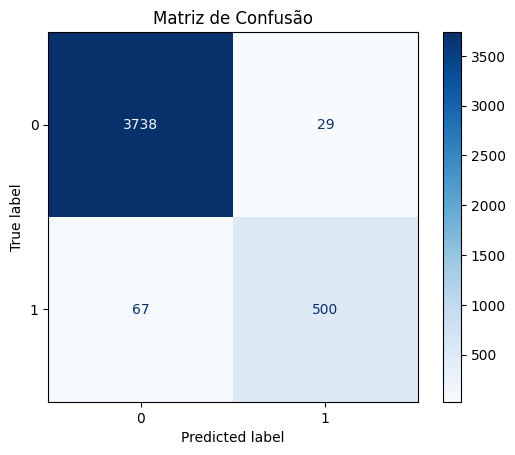

Acurácia: 0.98
Precisão: 0.95
Recall: 0.88


In [41]:
import pandas as pd
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb

X_treino.columns = X_treino.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_teste.columns = X_teste.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)



model = lgb.LGBMClassifier(random_state=42) #
model.fit(X_treino, y_treino)

probs = model.predict_proba(X_teste)[:, 1]  

y_pred = (probs >= 0.5).astype(int)

cm = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


accuracy = accuracy_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')